<a href="https://colab.research.google.com/github/teaminii/MachineLearning/blob/main/Linear_regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)

     |████████████████████████████████| 591.8 MB 647 bytes/s 
     |████████████████████████████████| 21.0 MB 1.3 MB/s 
     |████████████████████████████████| 23.2 MB 1.4 MB/s 
     |████████████████████████████████| 23.3 MB 1.2 MB/s 
     |████████████████████████████████| 23.3 MB 76.8 MB/s 
     |████████████████████████████████| 22.1 MB 1.4 MB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 17.4 MB 798 kB/s 
     |████████████████████████████████| 17.3 MB 166 kB/s 
     |████████████████████████████████| 12.8 MB 17 kB/s 
     |████████████████████████████████| 12.7 MB 44.3 MB/s 
     |████████████████████████████████| 11.8 MB 56.2 MB/s 
     |████████████████████████████████| 5.9 MB 36.7 MB/s 
     |████████████████████████████████| 6.6 MB 67.9 MB/s 
     |████████████████████████████████| 6.6 MB 44.9 MB/s 
     |████████████████████████████████| 4.0 MB 52.0 MB/s 
     |████████████████████████████████| 10.2 MB 43.9 MB/s 
     |█

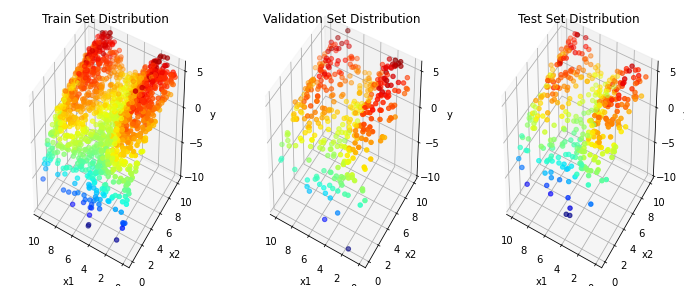

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# ====== Generating Dataset ====== #
num_data = 2400

x1 = np.random.rand(num_data) * 10
x2 = np.random.rand(num_data) * 10
e = np.random.normal(0, 0.5, num_data)    
X = np.array([x1, x2]).T
y = 2*np.sin(x1) + np.log(0.5*x2**2) + e
# ====== Split Dataset into Train, Validation, Test ======#
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]

# ====== Visualize Each Dataset ====== #
fig = plt.figure(figsize=(12,5))     #여러개의 ,plot을 만들고 싶을 때 
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')   ### 트레이닝에 사용할 data set   #c : color

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)      ## z축의 범위를 설정
ax1.view_init(40, -60)    ## 3D에서 보이는 각도를 설정  
ax1.invert_xaxis()        ## x축을 invert 

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()

In [5]:
import torch
import torch.nn as nn

## W : 1차원으로 바꿔줌 b:1차원 H:파일n개 1차원

class LinearModel(nn.Module):
    def __init__(self): 
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=2, out_features=1, bias=True)
    
    def forward(self, x):   ## forward 는 바꾸지 말기 .
    # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴합니다.
        return self.linear(x)
    
    
class MLPModel(nn.Module):
    def __init__(self): 
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
    # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴합니다.
        x = self.linear1(x)
        x = self.relu(x)       #선형적이지 않은 transform
        x = self.linear2(x)    #선형적           # 위의 두줄을 반복하면 deep 인공신경망이라고 한다. 
        return x


lm = LinearModel()
print(lm.linear.weight)
print(lm.linear.bias)

Parameter containing:
tensor([[-0.5456, -0.0103]], requires_grad=True)
Parameter containing:
tensor([-0.0745], requires_grad=True)


In [6]:
reg_loss = nn.MSELoss()

#uncomment for testing Loss Function

test_pred_y = torch.Tensor([0,0,0,0])
test_true_y = torch.Tensor([0,1,0,1])

print(reg_loss(test_pred_y, test_true_y))    # 2 /4 = 0.5 
print(reg_loss(test_true_y, test_true_y))   # 100%로로 예측한 것이기 때문에 loss값이 0



tensor(0.5000)
tensor(0.)


3 parameters


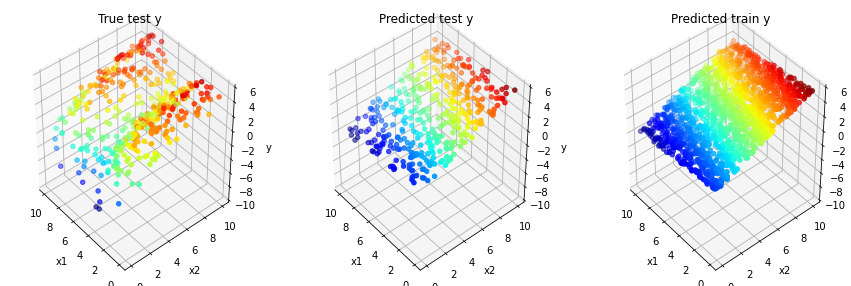

0 tensor(3.2111, grad_fn=<MseLossBackward>)


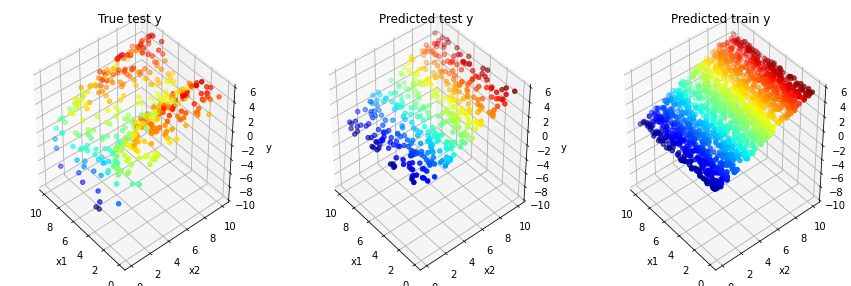

200 tensor(2.9530, grad_fn=<MseLossBackward>)


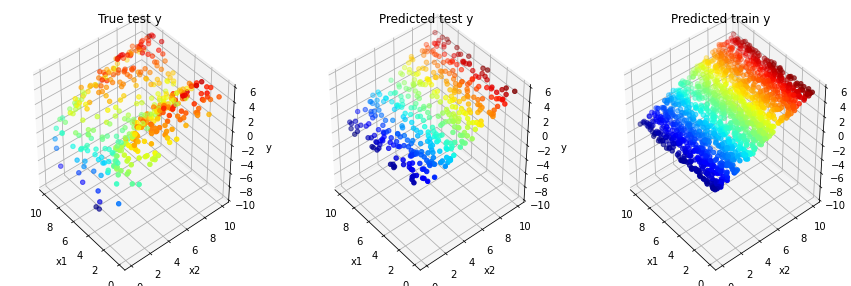

400 tensor(2.9495, grad_fn=<MseLossBackward>)


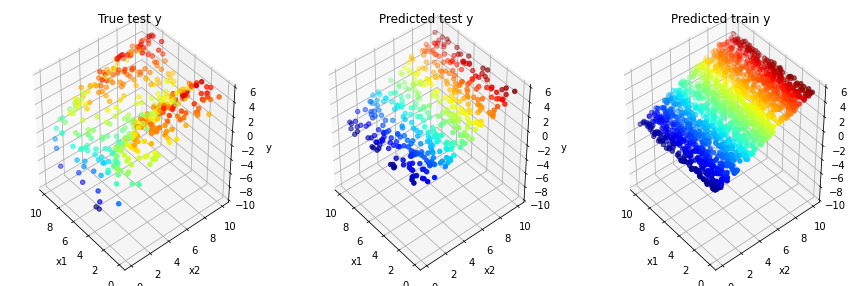

600 tensor(2.9475, grad_fn=<MseLossBackward>)


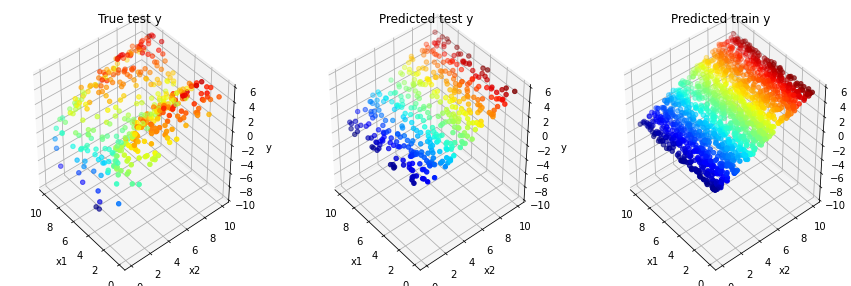

800 tensor(2.9463, grad_fn=<MseLossBackward>)


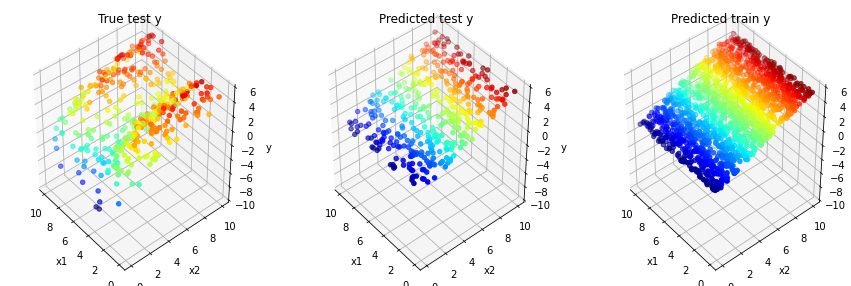

1000 tensor(2.9456, grad_fn=<MseLossBackward>)


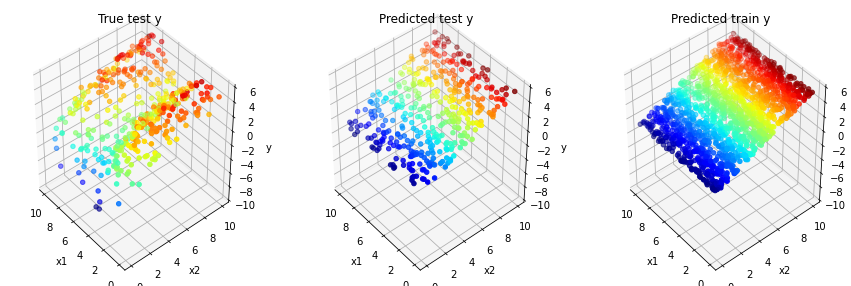

1200 tensor(2.9453, grad_fn=<MseLossBackward>)


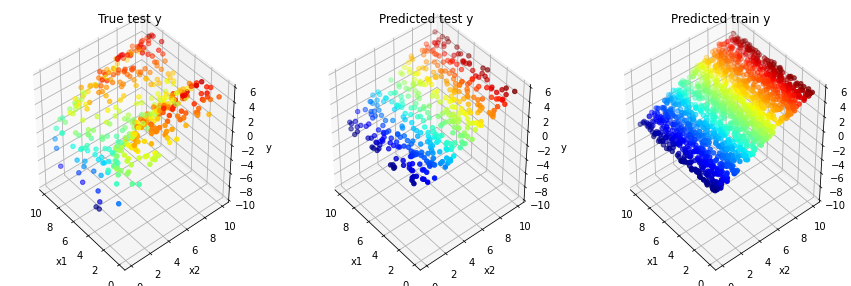

1400 tensor(2.9450, grad_fn=<MseLossBackward>)


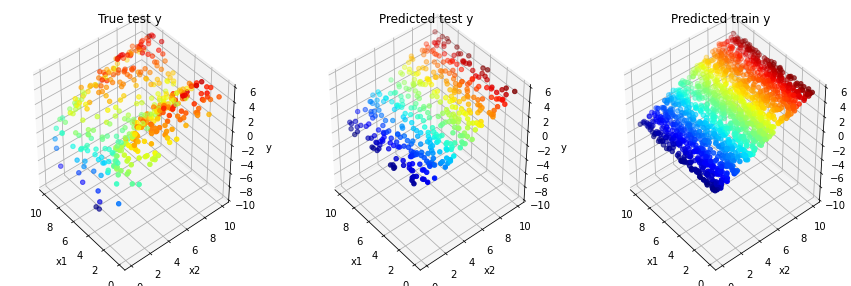

1600 tensor(2.9449, grad_fn=<MseLossBackward>)


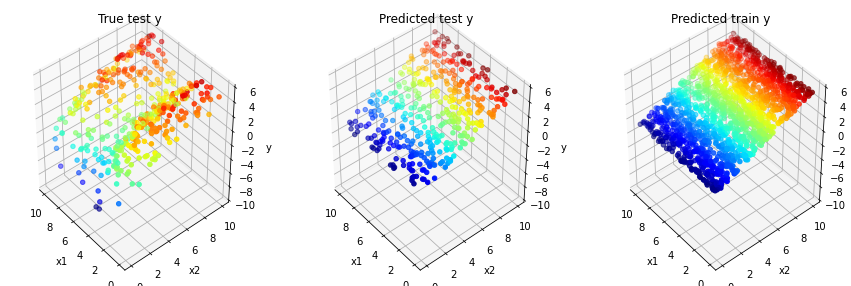

1800 tensor(2.9448, grad_fn=<MseLossBackward>)


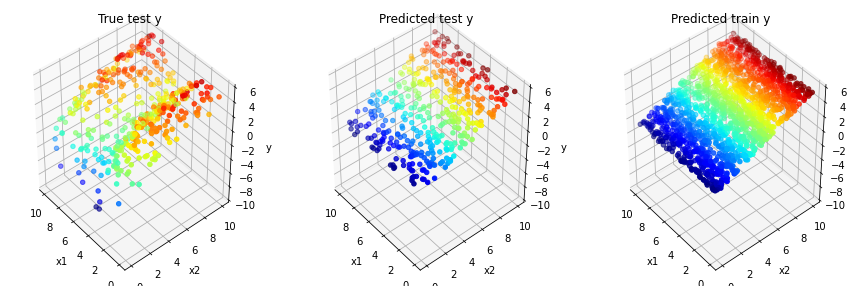

2000 tensor(2.9448, grad_fn=<MseLossBackward>)


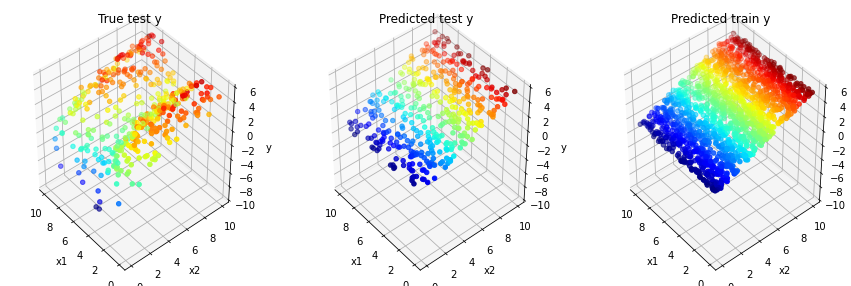

2200 tensor(2.9448, grad_fn=<MseLossBackward>)


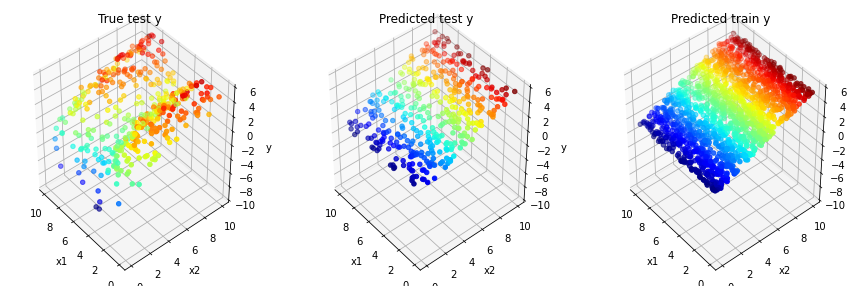

2400 tensor(2.9448, grad_fn=<MseLossBackward>)


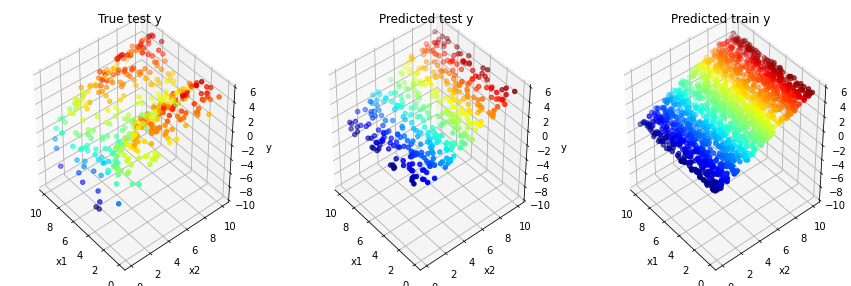

2600 tensor(2.9448, grad_fn=<MseLossBackward>)


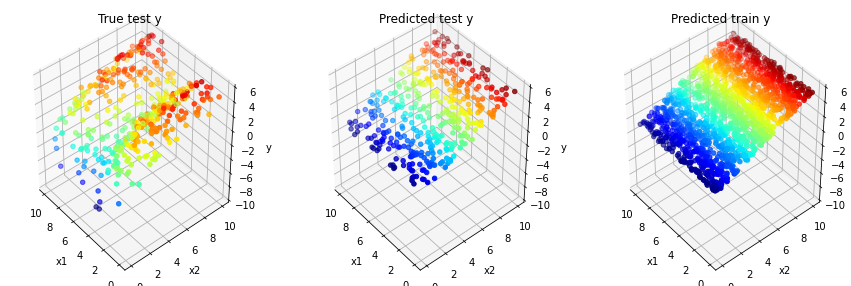

2800 tensor(2.9447, grad_fn=<MseLossBackward>)


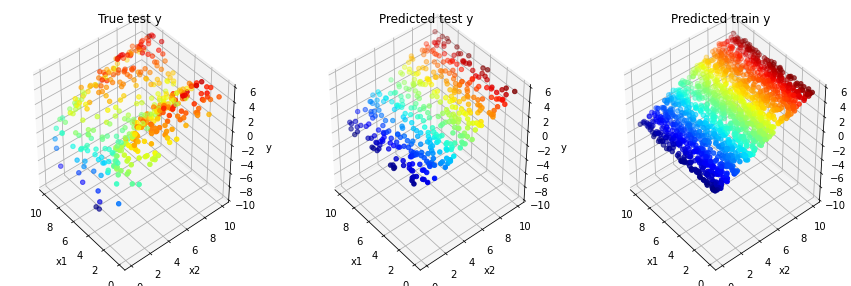

3000 tensor(2.9447, grad_fn=<MseLossBackward>)


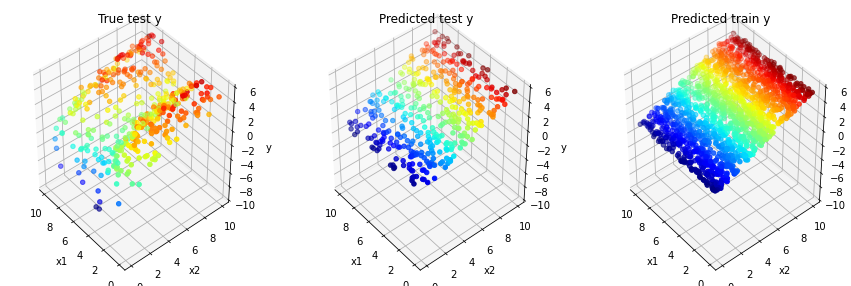

3200 tensor(2.9447, grad_fn=<MseLossBackward>)


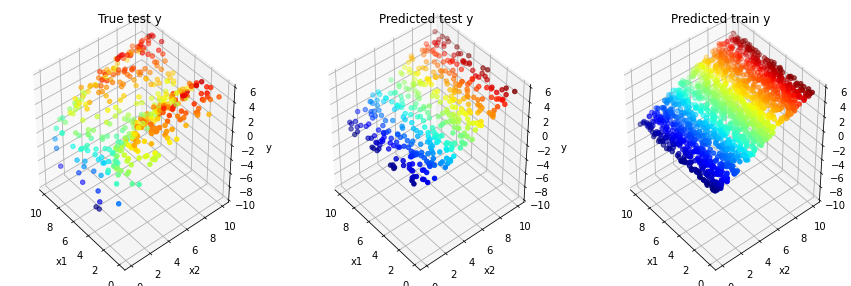

3400 tensor(2.9447, grad_fn=<MseLossBackward>)


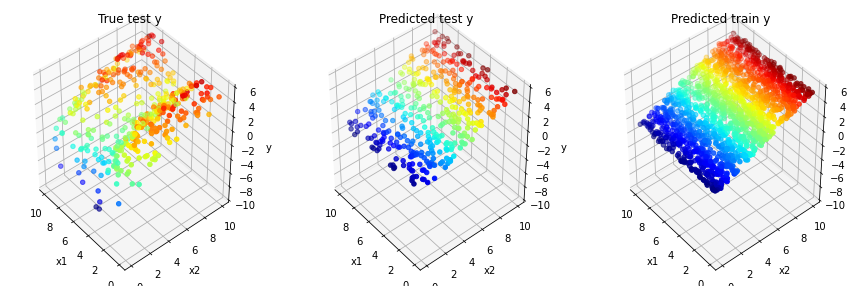

3600 tensor(2.9447, grad_fn=<MseLossBackward>)


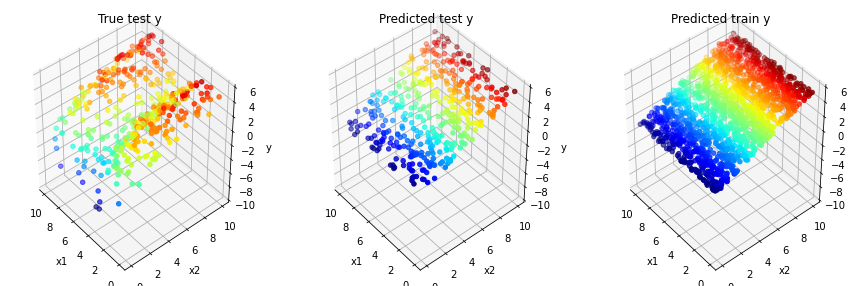

3800 tensor(2.9447, grad_fn=<MseLossBackward>)


In [8]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error


# ====== Construct Model ====== #
model = LinearModel()
# print(model.linear.weight)
# print(model.linear.bias)

#model = MLPModel() # Model을 생성해줍니다.
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad))) # 복잡해보이지만 간단히 모델 내에 학습을 당할 파라미터 수를 카운팅하는 코드입니다.

# ===== Construct Optimizer ====== #
lr = 0.005 # Learning Rate를 하나 정해줍니다. (원할한 학습을 위해 손을 많이 탑니다)
optimizer = optim.SGD(model.parameters(), lr=lr) # Optimizer를 생성해줍니다.    # model.parameters : w,b 가 전달됨


# 매 학습 단계에서의 epoch값과 그 때의 loss 값을 저장할 리스트를 만들어줍시다.
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []


epoch = 4000 # 학습 횟수(epoch)을 지정해줍시다.  #### epoch : 1600개를 가지고 한번 학습시키면 1epoch
####iteration : parameter가 한번 update되는 것
## 데이터를 청킹하여(끊어서 ) 청크를 미니배치라고 함. 미니배치를 넣고 업데이트를 시키는 것이 한번의 이터레이션 청크  100번의 청크를 돌면 1epoch 를 도는 것 
## 1만개의 데이터가 있고 100개의 청크가 있으면 100번의 iteration을 돌면 1epoch을 도는 것. 

for i in range(epoch):
    
    # ====== Train ====== #
    ### train을 할 때 model.train()을 호출해주는 습관을 가지자. 

    model.train() # model을 train 모드로 세팅합니다. 반대로 향후 모델을 평가할 때는 eval() 모드로 변경할 겁니다 (나중 실습에서 쓸 겁니다)
    optimizer.zero_grad() # optimizer에 남아있을 수도 있는 잔여 그라디언트를 0으로 다 초기화해줍니다.
    
    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)         ## 예측값
    #print(input_x.shape, true_y.shape, pred_y.shape) # 각 인풋과 아웃풋의 차원을 체크해봅니다.
    
    loss = reg_loss(pred_y.squeeze(), true_y)    ### squeeze 
    loss.backward() ### backward()를 통해서 그라디언트를 구해줍니다.    ###loss 값이 벡터로 안나와야 한다. 
    optimizer.step() # step()을 통해서 그라디언틀르 바탕으로 파라미터를 업데이트 해줍니다. 
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    
    # ====== Validation ====== #
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)   
    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    

    # ====== Evaluation ======= #
    if i % 200 == 0: # 200회의 학습마다 실제 데이터 분포와 모델이 예측한 분포를 그려봅니다.
        
        # ====== Calculate MAE ====== #
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy() 
        mae = mean_absolute_error(true_y, pred_y) # sklearn 쪽 함수들은 true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것에 주의합시다
        list_mae.append(mae)
        list_mae_epoch.append(i)
        
        fig = plt.figure(figsize=(15,5))
        
        # ====== True Y Scattering ====== #
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
        
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.set_title('True test y')
        ax1.invert_xaxis()

        # ====== Predicted Y Scattering ====== #
        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.set_title('Predicted test y')
        ax2.invert_xaxis()

        # ====== Just for Visualizaing with High Resolution ====== #
        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40, -40)
        ax3.set_title('Predicted train y')
        ax3.invert_xaxis()
        
        plt.show()
        print(i, loss)

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()